In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [38]:
filename = 'Data/insurance.csv'
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1 - Do smokers have higher insurance charges than non-smokers?

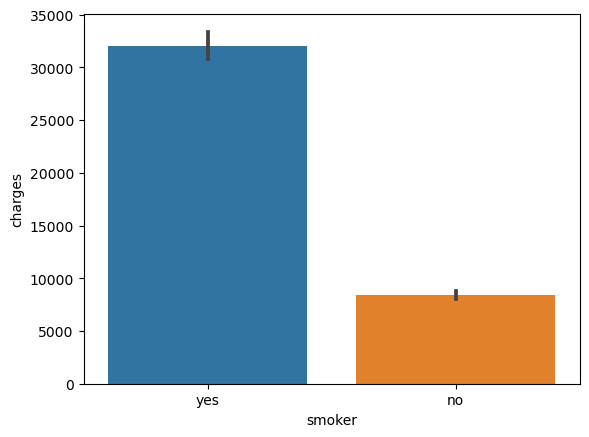

In [34]:
sns.barplot(data = df, x = 'smoker', y = 'charges');

null hypothesis: smokers do not have higher insurance charges than non-smokers.

alternate hypothesis: smokers have higher insurance charges than non-smokers.

Test to use: t test

Assumptions:
- normal distribution
- equal variance
-no outliers

In [3]:
smokes = df.loc[ df['smoker'] == 'yes'].copy()
no_smokes = df.loc[ df['smoker'] == 'no'].copy()

smoker_charges = smokes['charges']
non_smoker_charges = no_smokes['charges']

smoker charges and non-smoker charges are normally distributed.

In [4]:
print(f'The normal test result for smoker charges is {stats.normaltest(smoker_charges)}.\n')
print(f'The normal test result for non smoker charges is {stats.normaltest(non_smoker_charges)}.')

The normal test result for smoker charges is NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14).

The normal test result for non smoker charges is NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69).


In [5]:
zscore_smoker_charges = stats.zscore(smoker_charges)
zscore_non_smoker_charges = stats.zscore(non_smoker_charges)

outliers_smoker_charges = abs(zscore_smoker_charges) > 3
outliers_non_smoker_charges = abs(zscore_non_smoker_charges) > 3

print(f'there are {np.sum(outliers_smoker_charges)} outliers in smoker charges.\n')
print(f' there are {np.sum(outliers_non_smoker_charges)} outliers in non smoker charges')

there are 0 outliers in smoker charges.

 there are 24 outliers in non smoker charges


In [6]:
len(smoker_charges)

274

In [7]:
len(non_smoker_charges)

1064

In [8]:
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [9]:
zscore_non_smoker_charges = stats.zscore(non_smoker_charges)
outliers_non_smoker_charges = abs(zscore_non_smoker_charges) > 3

In [10]:
len(non_smoker_charges)

1040

In [11]:
equal_variance = stats.levene(smoker_charges, non_smoker_charges)
equal_variance

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Executing the test

In [12]:
t_test = stats.ttest_ind(smoker_charges, non_smoker_charges)
t_test

Ttest_indResult(statistic=51.2078044173717, pvalue=3.68768124e-315)

p-value = 3.68768124e-315

alpha = 0.05

p-value < alpha, so reject the null hypothesis. Smokers have higher insurance charges than non-smokers.

## Q2 - Are men more likely to smoke than women?

In [54]:
gen_smokes = smokes['sex']
smoker_sex = gen_smokes.value_counts()

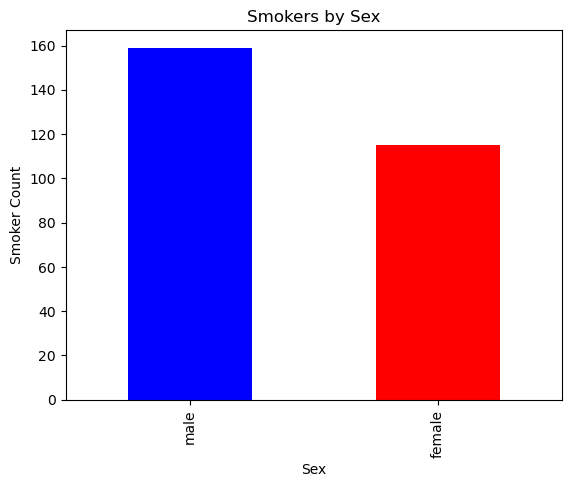

In [63]:
smoker_sex.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Smokers by Sex')
plt.ylabel('Smoker Count')
plt.xlabel('Sex');

binomial - Chi - squared

In [19]:
table = pd.crosstab(df['sex'], df['smoker'])
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [20]:
print(p)
p<0.05

0.006548143503580696


True

Since the p-value is less than alpha, reject the null hypothesis.

We can conclude that men are more likely to smoke than women.

## Q3 - Do different regions have different charges, on average?

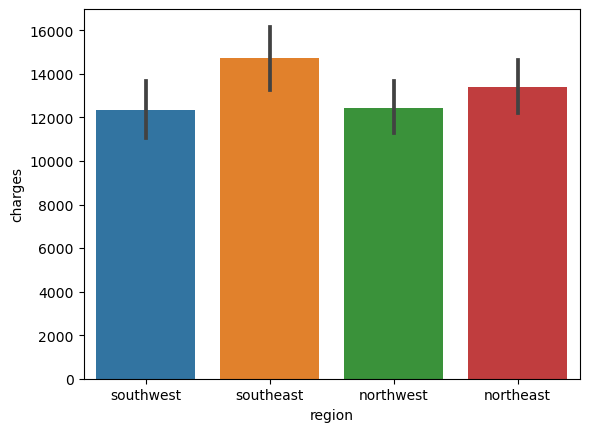

In [33]:
sns.barplot(data = df, x = 'region', y = 'charges');

testing assumptions

In [23]:
groups = {}

for i in df['region'].unique():
    
    data = df.loc[df['region'] == i, 'charges'].copy()
    
    groups[i] = data

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [25]:
norm_results = {}

for i, data in groups.items():
    
    stat, p = stats.normaltest(data)
    
    norm_results[i] = {'n': len(data),
                      'p': p,
                      'test stat': stat,}
    
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df['sig'] = norm_results_df['p'] < 0.05
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [27]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

ANOVA test

In [28]:
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [30]:
values = df['charges']
labels = df['region']

In [31]:
tukeys_results = pairwise_tukeyhsd(values, labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


The southeast and the southwest have different charges.